In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [111]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import warnings
import re

from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')

In [3]:
#코랩 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [4]:
# 실행결과 경고메시지 출력 제외
import warnings
import platform
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [89]:
df_raw = pd.read_csv("/content/drive/MyDrive/포스코 빅데이터 아카데미/빅데이터 프로젝트/중고차 가격 예측 프로젝트/Car.csv", encoding = 'euc-kr')
df_raw.head()

# df_raw 총 13개 열, 7253 행 데이터

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [90]:
#데이터 열 정보 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [91]:
df_raw.isnull().sum()

,0
Name,0
Location,0
Price,1053
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [92]:
# 숫자형 변수들 요약통계량
df_raw.describe()

,Price,Year,Kilometers_Driven,Seats
count,6200.000000,7253.000000,7.253000e+03,7200.000000
mean,14912.514750,2013.365366,5.869906e+04,5.279722
std,17674.318464,3.254421,8.442772e+04,0.811660
min,7.080000,1996.000000,1.710000e+02,0.000000
25%,5365.360000,2011.000000,3.400000e+04,5.000000
50%,8814.520000,2014.000000,5.341600e+04,5.000000
75%,15869.972500,2016.000000,7.300000e+04,5.000000
max,245273.600000,2019.000000,6.500000e+06,10.000000


# 데이터 타입 및 단위 제거

In [93]:
# 뒤에 붙은 단위 제거
df_raw['Mileage'] = df_raw['Mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df_raw['Engine'] = df_raw['Engine'].str.extract(r'(\d+)').astype(float)  # 정수지만 float 처리
df_raw['Power'] = df_raw['Power'].str.extract(r'(\d+\.?\d*)').astype(float)
df_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN


In [94]:
df_raw['Fuel_Type'].value_counts() # 전기차가 2개만 존재
# 다행히 test data에 electric이 없음 -> 버릴 예정

,count
Fuel_Type,
Diesel,3852
Petrol,3325
CNG,62
LPG,12
Electric,2


In [95]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


# 결측치 확인 및 처리

- New_Price 열 제거

In [96]:
# 결측치 처리
df = df_raw.drop(columns = ['New_Price'], axis = 1)
# New_Price의 결측값이 너무 많이 발견되어, New_Price 열을 삭제하기로 결정
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0


- "Price" 열 제거(Test data로 쓰일 예정)

In [97]:
#Price의 결측값 삭제 (목표변수) -> 나중에 test data로 사용
df.dropna(subset = ['Price'], inplace = True)

- "Mileage"열 제거

In [98]:
# 연비가 Nan인 데이터 확인
# 전기차는 연비라는 게 없음. 다행히 test data에 Electric이 없기 때문에 결측치 처리
df[df['Mileage'].isnull() == True]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
4446,Mahindra E Verito D4,Chennai,19928.48,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,19545.24,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0


In [99]:
# Mileage 결측치 제거
df.dropna(subset = ['Mileage'], inplace = True)

In [100]:
df.info()

# Mileage 결측값 제거 완료
# Engine 결측값 36개
# Power 결측값 143개
# Seats 결측값 42개

<class 'pandas.core.frame.DataFrame'>
Index: 6198 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6198 non-null   object 
 1   Location           6198 non-null   object 
 2   Price              6198 non-null   float64
 3   Year               6198 non-null   int64  
 4   Kilometers_Driven  6198 non-null   int64  
 5   Fuel_Type          6198 non-null   object 
 6   Transmission       6198 non-null   object 
 7   Owner_Type         6198 non-null   object 
 8   Mileage            6198 non-null   float64
 9   Engine             6162 non-null   float64
 10  Power              6055 non-null   float64
 11  Seats              6156 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 629.5+ KB


- Mileage 값이 0인 행 존재 58개-> 이상치의 영향을 덜 받는 중앙값으로 대체

In [116]:
df[df['Mileage']==0].count()

,0
Name,58
Location,58
Price,58
Year,58
Kilometers_Driven,58
Fuel_Type,58
Transmission,58
Owner_Type,58
Mileage,58
Engine,58


In [117]:
# Mileage 값이 0인 경우 확인
mileage_zero_count = (df['Mileage'] == 0).sum()

# Mileage의 중앙값 계산 (0이 아닌 값들만 고려)
mileage_median = df[df['Mileage'] > 0]['Mileage'].median()

# Mileage 값이 0인 행을 중앙값으로 대체
df.loc[df['Mileage'] == 0, 'Mileage'] = mileage_median

# 대체된 값 확인
mileage_zero_after = (df['Mileage'] == 0).sum()

# 결과 출력
print(f"대체 전 Mileage 값이 0인 행 개수: {mileage_zero_count}")
print(f"대체 후 Mileage 값이 0인 행 개수: {mileage_zero_after}")
print(f"대체된 Mileage 중앙값: {mileage_median}")

대체 전 Mileage 값이 0인 행 개수: 58
대체 후 Mileage 값이 0인 행 개수: 0
대체된 Mileage 중앙값: 18.365


- "Engine" 열

In [101]:
# 원본 데이터 백업
df_before = df.copy()

# 각 그룹별 고유한 Engine 값 개수 확인
engine_counts = df.groupby(['Name', 'Fuel_Type', 'Year'])['Engine'].nunique()

# 고유한 Engine 값이 딱 하나만 존재하는 그룹을 필터링
valid_groups = engine_counts[engine_counts == 1].index

# Engine 값이 NaN인 경우, 같은 Name, Fuel_Type, Year 그룹에서 유일한 값을 대체하는 함수
def fill_unique_engine(row):
    if pd.isna(row['Engine']):  # Engine 값이 NaN인 경우
        group = (row['Name'], row['Fuel_Type'], row['Year'])
        if group in valid_groups:  # 해당 그룹이 유일한 Engine 값을 가질 때만 대체
            return df.loc[(df['Name'] == row['Name']) &
                          (df['Fuel_Type'] == row['Fuel_Type']) &
                          (df['Year'] == row['Year']), 'Engine'].dropna().iloc[0]
    return row['Engine']  # 조건을 만족하지 않으면 원래 값 유지

# Engine 값 채우기 적용
df['Engine'] = df.apply(fill_unique_engine, axis=1)

# 대체된 Engine 값 찾기 (원본은 NaN, 현재 데이터에서는 값이 있는 경우)
filled_engine = df[(df['Engine'].notnull()) & (df_before['Engine'].isnull())].copy()

# 어떤 열을 참고해서 채웠는지 확인 (같은 Name, Fuel_Type, Year에서 가져옴)
filled_engine['Reference_Values'] = filled_engine.apply(
    lambda row: df_before.loc[
        (df_before['Name'] == row['Name']) &
        (df_before['Fuel_Type'] == row['Fuel_Type']) &
        (df_before['Year'] == row['Year']), 'Engine'
    ].dropna().unique(), axis=1
)

# 결과 출력
if not filled_engine.empty:
    print("새롭게 채워진 Engine 값이 있는 행들:")
    print(filled_engine[['Name', 'Fuel_Type', 'Year', 'Engine', 'Reference_Values']].head(10))  # 처음 10개만 출력
else:
    print("대체된 Engine 값이 없습니다.")

새롭게 채워진 Engine 값이 있는 행들:
                   Name Fuel_Type  Year  Engine Reference_Values
194  Honda City 1.5 GXI    Petrol  2007  1493.0         [1493.0]


In [102]:
df.isnull().sum()
# Engine 결측값 하나 채워짐

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,35


In [103]:
# Engine 결측치 제거
df.dropna(subset = ['Engine'], inplace = True)

In [104]:
df.isnull().sum()

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


- "Power" 회귀로 값 대체

In [106]:
# Engine과 Power은 산점도 그래프를 통해서 강한 상관관계가 있는 것을 알 수 있음으로 회귀 분석을 통해 Engine의 경향을 토대로 Power을 예측해 결측치를 넣어줌
train_df = df.dropna()
test_df = df[df['Power'].isnull()]
X_train = train_df[['Engine']]
y_train = train_df['Power']
model = LinearRegression()
model.fit(X_train, y_train)
X_test = test_df[['Engine']]
y_pred = model.predict(X_test)
df.loc[df['Power'].isnull(), 'Power'] = y_pred
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0


In [107]:
df.isnull().sum()

# power 결측값 다 대체됨

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


- "Seats" 최빈값으로 대체

In [108]:
mode_seats = df['Seats'].mode()[0] # 최빈값 중 첫번째 값 가져옴 (최빈값 5로 대체)
df['Seats'].fillna(mode_seats, inplace=True)
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0


In [109]:
df.isnull().sum()

# 결측값 모두 해결 완료

,0
Name,0
Location,0
Price,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [112]:
df[df['Seats']==0] # Seats 수가 0개인 데이터 1개 존재

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,Petrol,Automatic,First,10.5,3197.0,235.885794,0.0


In [113]:
df = df[df['Seats'] != 0]

In [119]:
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0
7232,Jeep Compass 1.4 Sport,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0
7235,Maruti Vitara Brezza ZDi,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0


- df 결측치 처리 완료된 데이터 프레임(열 12개, 최종 데이터 6162개)

#파생변수 생성

- Brand (차 브랜드)

In [120]:
len(np.unique(list(df.Name))) # 자동차 모델 종류 총 1902개

1902

In [121]:
df['Brand'] = df.Name.apply(lambda x:x.split()[0])
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi


- car_age (연식)

In [122]:
current_year = 2024
df['car_age'] = current_year - df['Year']
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,car_age
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,9
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,13
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,11


- yearly_mileage

In [123]:
# 주행 거리 대비 연식(연평균 주행 거리) 계산
df['yearly_mileage'] = df['Mileage'] / df['car_age']
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,car_age,yearly_mileage
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,14,1.900000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,9,2.185556
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,13,1.400000
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,12,1.730833
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,11,1.381818


- Income Level

In [142]:
rich_areas = ["Mumbai", "Delhi", "Bangalore", "Pune", "Hyderabad"]
middle_areas = ["Chennai", "Kolkata", "Coimbatore", "Kochi"]
poor_areas = ["Ahmedabad", "Jaipur"]

def classify_income(location):
    if location in rich_areas:
        return "상 (부유한)"
    elif location in middle_areas:
        return "중 (중산층)"
    elif location in poor_areas:
        return "하 (저소득)"
    else:
        return "기타"

df["Income Level"] = df["Location"].apply(classify_income)
df.drop(["Location"],axis=1,inplace=True)
df.head()

,Name,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,car_age,yearly_mileage,Income Level
0,Maruti Wagon R LXI CNG,7.894944,2010,72000,CNG,Manual,First,3.317816,6.906755,4.080246,5.0,Maruti,14,1.900000,상 (부유한)
1,Hyundai Creta 1.6 CRDi SX Option,9.860737,2015,41000,Diesel,Manual,First,3.028683,7.367077,4.845761,5.0,Hyundai,9,2.185556,상 (부유한)
2,Honda Jazz V,8.839178,2011,46000,Petrol,Manual,First,2.954910,7.090077,4.496471,5.0,Honda,13,1.400000,중 (중산층)
3,Maruti Ertiga VDI,9.126824,2012,87000,Diesel,Manual,First,3.080533,7.130099,4.497139,7.0,Maruti,12,1.730833,중 (중산층)
4,Audi A4 New 2.0 TDI Multitronic,10.210815,2013,40670,Diesel,Automatic,Second,2.785011,7.585281,4.954418,5.0,Audi,11,1.381818,중 (중산층)


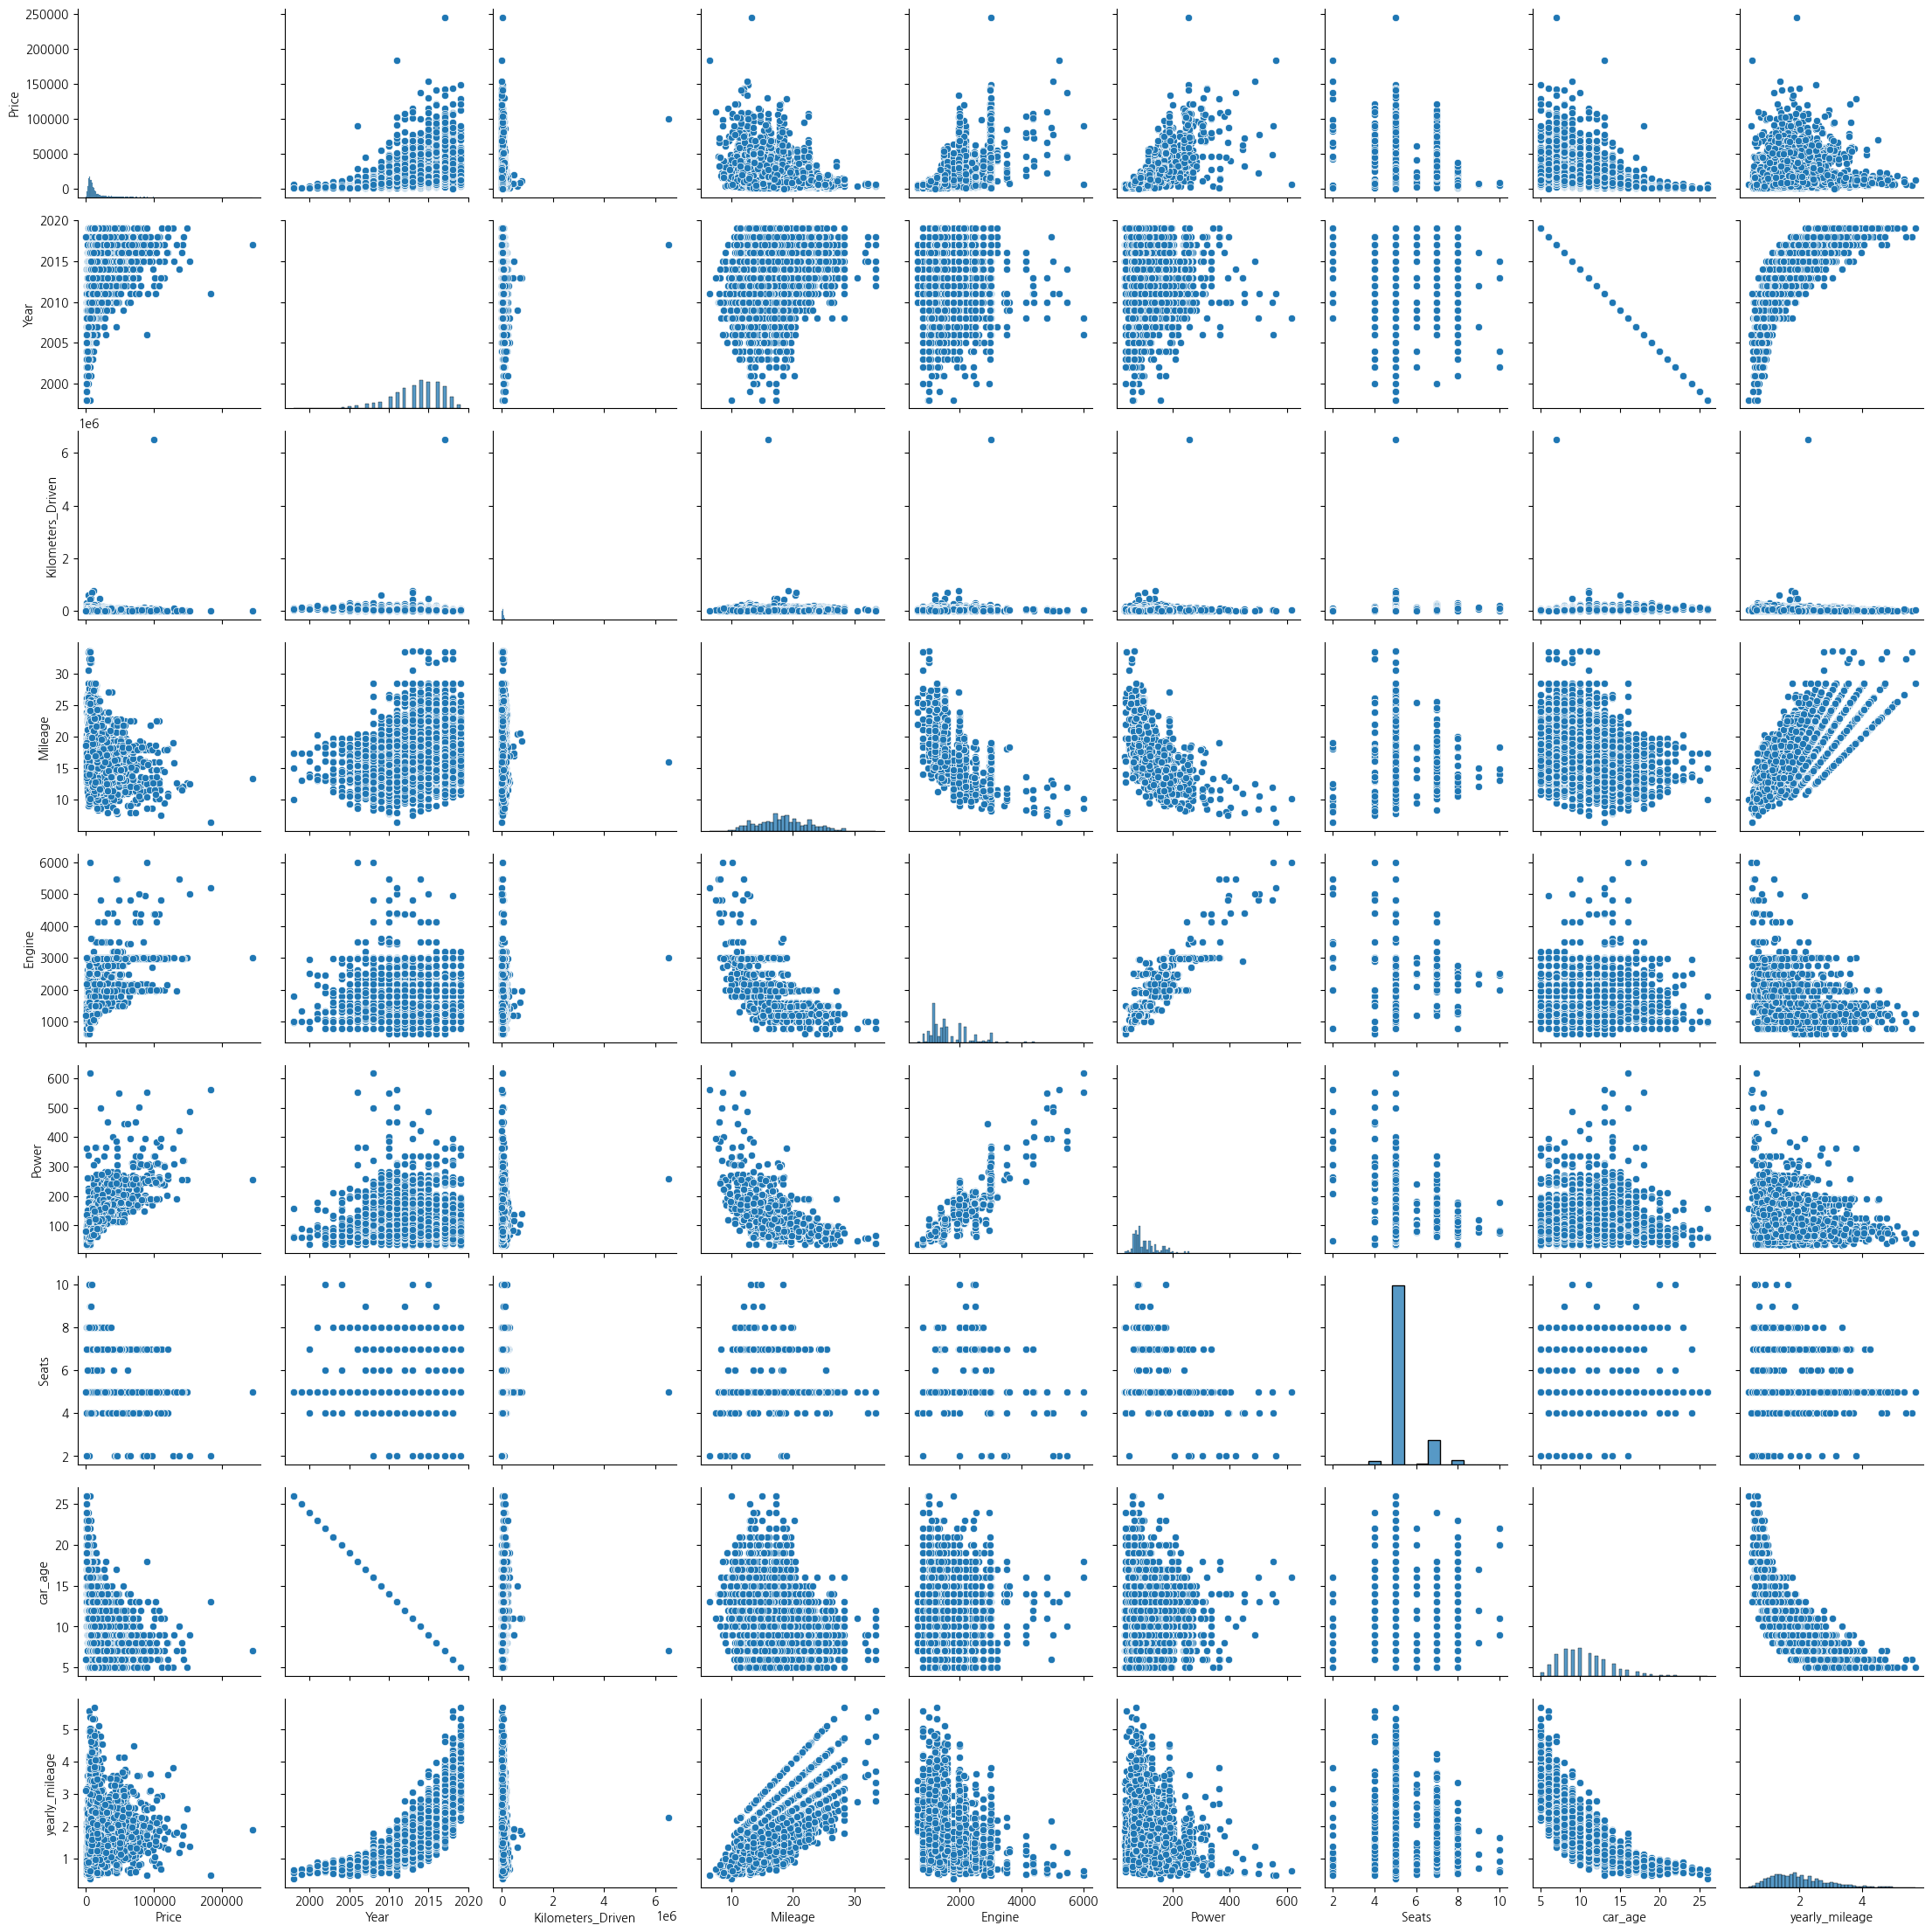

In [127]:
sns.pairplot(df)

#이상치 처리

<Axes: xlabel='Kilometers_Driven'>

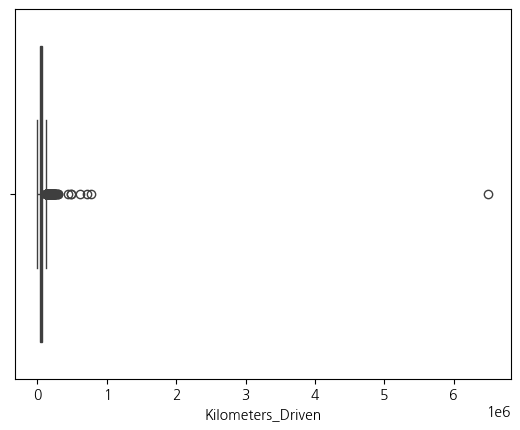

In [128]:
sns.boxplot(x = df['Kilometers_Driven'])

# kilometer_driven 최대값은 6500000 으로 다른 차량보다 훨씬 더 많이 운행되었음을 나타내며, 이 값은 아마도 이상치 가능성이 있어 boxplot으로 확인

In [ ]:
# kilometers 변수 이상치 제거 전 = 6155개
# 1.5 IQR 이상치 제거 후 = 5948개
# 3 IQR 이상치 제거 후 = 6056개
# 4 IQR 이상치 제거 후 = 6077개

In [129]:
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

# IQR 규칙을 사용하여 이상치를 필터링
df = df[~((df['Kilometers_Driven'] < (Q1 - 4 * IQR)) | (df['Kilometers_Driven'] > (Q3 + 4 * IQR)))]

<Axes: xlabel='Kilometers_Driven'>

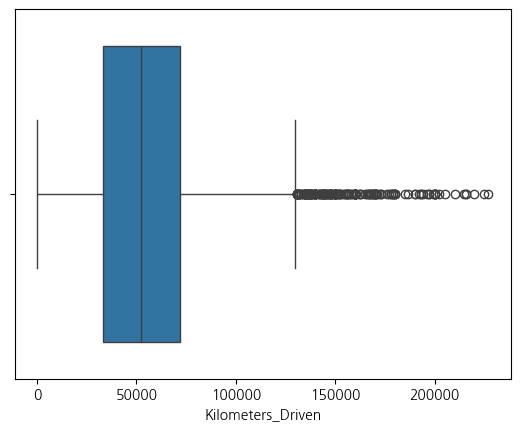

In [130]:
#이상치 필터링 후 다시 boxplot 확인
sns.boxplot(x = df['Kilometers_Driven'])

In [132]:
df_sorted = df.sort_values(by='Price', ascending=True)
df_sorted.head()

# Price가 너무 낮은 차가 존재

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,car_age,yearly_mileage
7236,Hyundai Elite i20 Magna Plus,Kochi,7.08,2018,23955,Petrol,Manual,First,18.6,1197.0,81.86,5.0,Hyundai,6,3.100000
1713,Tata Nano Lx,Pune,674.50,2011,65000,Petrol,Manual,Second,26.0,624.0,35.00,4.0,Tata,13,2.000000
3138,Maruti Zen LXI,Jaipur,689.83,1998,95150,Petrol,Manual,Third,17.3,993.0,60.00,5.0,Maruti,26,0.665385
1628,Maruti 800 Std BSIII,Jaipur,689.83,2004,12000,Petrol,Manual,Second,16.1,796.0,37.00,4.0,Maruti,20,0.805000
2847,Hyundai Getz GLS,Pune,689.83,2005,86000,Petrol,Manual,Second,15.3,1341.0,83.00,5.0,Hyundai,19,0.805263


In [133]:
# Price가 가장 낮은 차 제거
df = df[~((df['Name'] == 'Hyundai Elite i20 Magna Plus') & (df_raw['Price'] == 7.08))]
df_sorted = df.sort_values(by='Price', ascending=True)
df_sorted.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,car_age,yearly_mileage
1713,Tata Nano Lx,Pune,674.50,2011,65000,Petrol,Manual,Second,26.0,624.0,35.0,4.0,Tata,13,2.000000
2847,Hyundai Getz GLS,Pune,689.83,2005,86000,Petrol,Manual,Second,15.3,1341.0,83.0,5.0,Hyundai,19,0.805263
3138,Maruti Zen LXI,Jaipur,689.83,1998,95150,Petrol,Manual,Third,17.3,993.0,60.0,5.0,Maruti,26,0.665385
1628,Maruti 800 Std BSIII,Jaipur,689.83,2004,12000,Petrol,Manual,Second,16.1,796.0,37.0,4.0,Maruti,20,0.805000
2605,Tata Nano Cx,Jaipur,766.48,2010,57000,Petrol,Manual,First,26.0,624.0,35.0,4.0,Tata,14,1.857143


Text(0.5, 1.0, 'yearly_mileage')

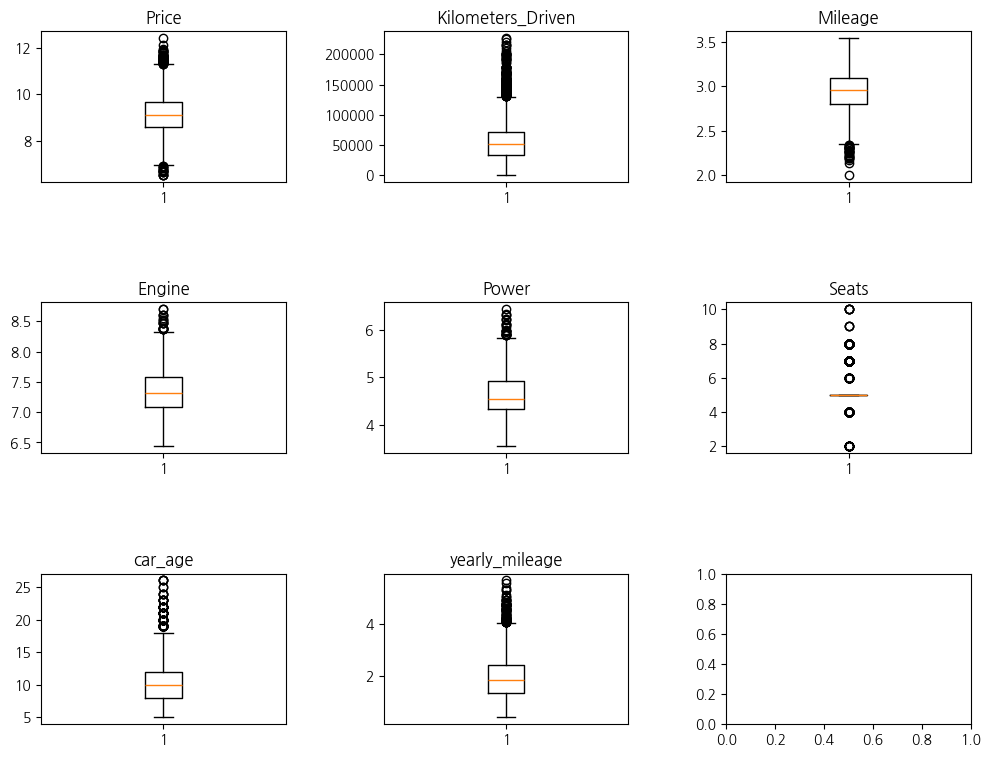

In [141]:
#이상치 확인을 위한 box-plot
fig, axs = plt.subplots(3, 3, figsize=(12, 9))
axs = axs.flatten()

fig.subplots_adjust(wspace=0.4, hspace=0.8)

axs[0].boxplot(df['Price'])
axs[0].set_title('Price')

axs[1].boxplot(df['Kilometers_Driven'])
axs[1].set_title('Kilometers_Driven')

axs[2].boxplot(df['Mileage'])
axs[2].set_title('Mileage')

axs[3].boxplot(df['Engine'])
axs[3].set_title('Engine')

axs[4].boxplot(df['Power'])
axs[4].set_title('Power')

axs[5].boxplot(df['Seats'])
axs[5].set_title('Seats')

axs[6].boxplot(df['car_age'])
axs[6].set_title('car_age')

axs[7].boxplot(df['yearly_mileage'])
axs[7].set_title('yearly_mileage')

- 로그 변환 전

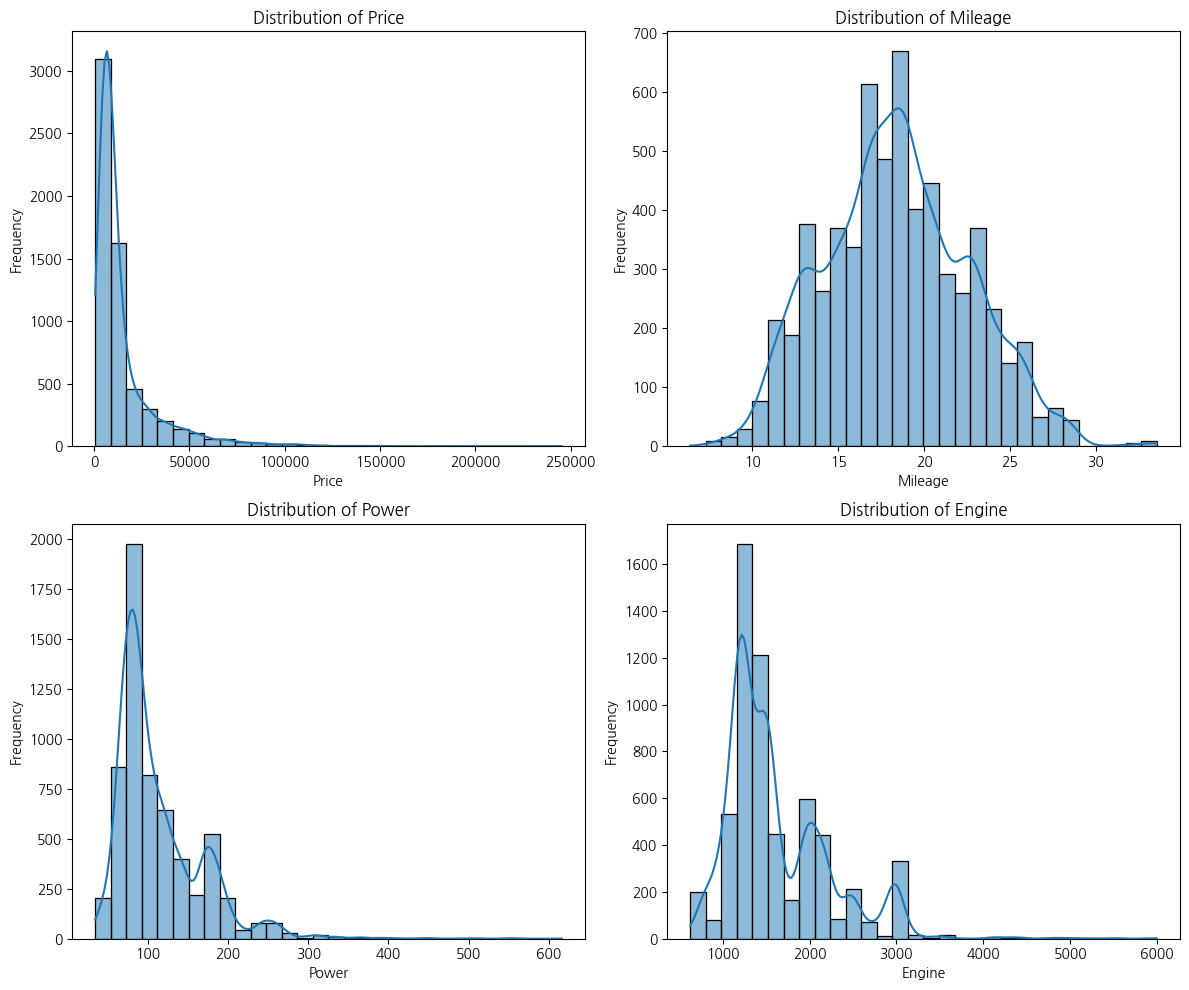

In [138]:
# 시각화할 컬럼 리스트
columns = ['Price', 'Mileage', 'Power', 'Engine']

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 각 컬럼에 대한 히스토그램 생성
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2)  # 2x2 위치 설정
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

In [139]:
# 로그 변환 (log1p 사용하여 0 값 처리)
df['Price'] = np.log1p(df['Price'])
df['Mileage'] = np.log1p(df['Mileage'])
df['Power'] = np.log1p(df['Power'])
df['Engine'] = np.log1p(df['Engine'])
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,car_age,yearly_mileage
0,Maruti Wagon R LXI CNG,Mumbai,7.894944,2010,72000,CNG,Manual,First,3.317816,6.906755,4.080246,5.0,Maruti,14,1.900000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,9.860737,2015,41000,Diesel,Manual,First,3.028683,7.367077,4.845761,5.0,Hyundai,9,2.185556
2,Honda Jazz V,Chennai,8.839178,2011,46000,Petrol,Manual,First,2.954910,7.090077,4.496471,5.0,Honda,13,1.400000
3,Maruti Ertiga VDI,Chennai,9.126824,2012,87000,Diesel,Manual,First,3.080533,7.130099,4.497139,7.0,Maruti,12,1.730833
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,10.210815,2013,40670,Diesel,Automatic,Second,2.785011,7.585281,4.954418,5.0,Audi,11,1.381818


- 로그 변환 후

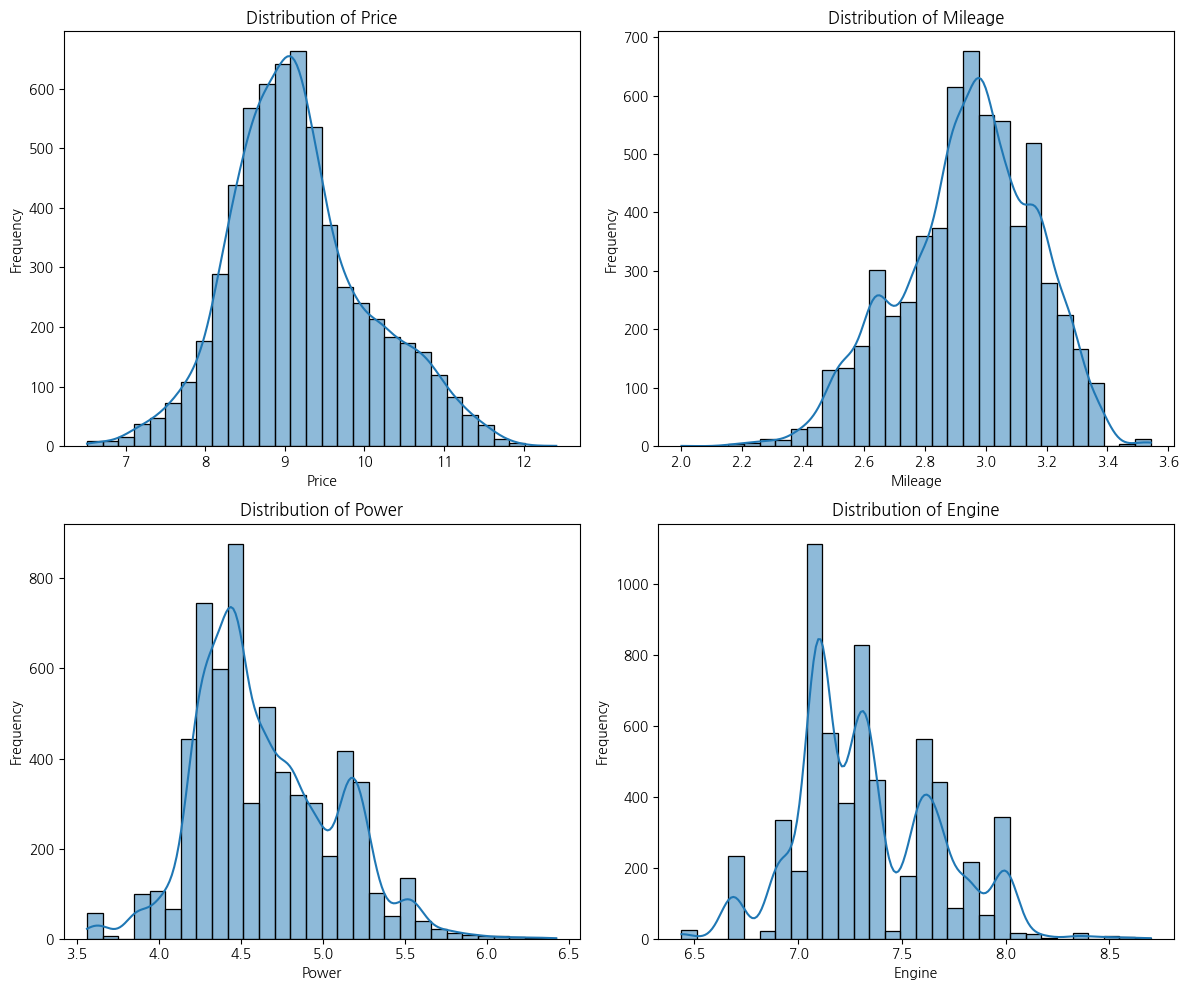

In [140]:
# 시각화할 컬럼 리스트
columns = ['Price', 'Mileage', 'Power', 'Engine']

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 각 컬럼에 대한 히스토그램 생성
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2)  # 2x2 위치 설정
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

#원핫인코딩

- name은 영향이 없으므로 제외함

In [144]:
df = df.drop(columns=['Name'])
df.head()

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,car_age,yearly_mileage,Income Level
0,7.894944,2010,72000,CNG,Manual,First,3.317816,6.906755,4.080246,5.0,Maruti,14,1.900000,상 (부유한)
1,9.860737,2015,41000,Diesel,Manual,First,3.028683,7.367077,4.845761,5.0,Hyundai,9,2.185556,상 (부유한)
2,8.839178,2011,46000,Petrol,Manual,First,2.954910,7.090077,4.496471,5.0,Honda,13,1.400000,중 (중산층)
3,9.126824,2012,87000,Diesel,Manual,First,3.080533,7.130099,4.497139,7.0,Maruti,12,1.730833,중 (중산층)
4,10.210815,2013,40670,Diesel,Automatic,Second,2.785011,7.585281,4.954418,5.0,Audi,11,1.381818,중 (중산층)


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6139 entries, 0 to 7235
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              6139 non-null   float64
 1   Year               6139 non-null   int64  
 2   Kilometers_Driven  6139 non-null   int64  
 3   Fuel_Type          6139 non-null   object 
 4   Transmission       6139 non-null   object 
 5   Owner_Type         6139 non-null   object 
 6   Mileage            6139 non-null   float64
 7   Engine             6139 non-null   float64
 8   Power              6139 non-null   float64
 9   Seats              6139 non-null   float64
 10  Brand              6139 non-null   object 
 11  car_age            6139 non-null   int64  
 12  yearly_mileage     6139 non-null   float64
 13  Income Level       6139 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 719.4+ KB


In [149]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Income Level'])

# 기존 숫자형(float) 컬럼 유지 & 더미 변수만 int로 변환
dummy_columns = df_encoded.select_dtypes(include=['bool']).columns  # 더미 변수 선택
df_encoded[dummy_columns] = df_encoded[dummy_columns].astype(int)

df_encoded.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,car_age,yearly_mileage,Fuel_Type_CNG,...,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Income Level_상 (부유한),Income Level_중 (중산층),Income Level_하 (저소득)
0,7.894944,2010,72000,3.317816,6.906755,4.080246,5.0,14,1.900000,1,...,0,0,0,0,0,0,0,1,0,0
1,9.860737,2015,41000,3.028683,7.367077,4.845761,5.0,9,2.185556,0,...,0,0,0,0,0,0,0,1,0,0
2,8.839178,2011,46000,2.954910,7.090077,4.496471,5.0,13,1.400000,0,...,0,0,0,0,0,0,0,0,1,0
3,9.126824,2012,87000,3.080533,7.130099,4.497139,7.0,12,1.730833,0,...,0,0,0,0,0,0,0,0,1,0
4,10.210815,2013,40670,2.785011,7.585281,4.954418,5.0,11,1.381818,0,...,0,0,0,0,0,0,0,0,1,0
